__Before using the codes below, notation:__

1. for the mixture component, using a sliced-like list.
<p>eg: V_water:V_toluene:V_ethanol = [::] </p>


# Version 1

# Retrieve the wavelength for the tie-line

## Import packages and set initial parameters for the graphs

In [1]:
from dataGadgets import *

plt.rcParams['figure.figsize'] = [10,6]
plt.rcParams['figure.dpi'] = 100

# for the folder where stores the *.csv file for the different mixture.

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import pandas as pd
Functions successfully imported!



In [2]:
# Other parameters 

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 
plt.rcParams['font.size'] = 18
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['lines.linewidth'] = 2


## Define the file path for the spectra (*.csv files)

In [3]:
specFold = 'curve_fit_tie_line/'

## set initial guess for the parameters, plot the original data and the fitted line

### For the upper and lower layer mixture Water: Toluene: Ethanol = [8.0, 5.3, 9.4]

In [4]:
# csv file format is '<*up|low>_<vol W>_<vol T>_<vol E>_<sample no>_<rep no>'

upper_raw_sample01_01 = yld_rawdata(specFold+'up_8W_5.3T_9.4E_sample01_01.csv',6)
upper_raw_sample01_02 = yld_rawdata(specFold+'up_8W_5.3T_9.4E_sample01_02.csv',6)
upper_raw_sample01_03 = yld_rawdata(specFold+'up_8W_5.3T_9.4E_sample01_03.csv',6)
upper_raw_sample01_04 = yld_rawdata(specFold+'up_8W_5.3T_9.4E_sample01_04.csv',6)
upper_raw_sample01_05 = yld_rawdata(specFold+'up_8W_5.3T_9.4E_sample01_05.csv',6)

upper_wv_sample01_01,upper_inten_sample01_01 = yld_xy_sliced(upper_raw_sample01_01)
upper_wv_sample01_02,upper_inten_sample01_02 = yld_xy_sliced(upper_raw_sample01_02)
upper_wv_sample01_03,upper_inten_sample01_03 = yld_xy_sliced(upper_raw_sample01_03)
upper_wv_sample01_04,upper_inten_sample01_04 = yld_xy_sliced(upper_raw_sample01_04)
upper_wv_sample01_05,upper_inten_sample01_05 = yld_xy_sliced(upper_raw_sample01_05)

lower_raw_sample01_01 = yld_rawdata(specFold+'low_8W_5.3T_9.4E_sample01_01.csv',6)
lower_raw_sample01_02 = yld_rawdata(specFold+'low_8W_5.3T_9.4E_sample01_02.csv',6)
lower_raw_sample01_03 = yld_rawdata(specFold+'low_8W_5.3T_9.4E_sample01_03.csv',6)
lower_raw_sample01_04 = yld_rawdata(specFold+'low_8W_5.3T_9.4E_sample01_04.csv',6)
lower_raw_sample01_05 = yld_rawdata(specFold+'low_8W_5.3T_9.4E_sample01_05.csv',6)

lower_wv_sample01_01,lower_inten_sample01_01 = yld_xy_sliced(lower_raw_sample01_01)
lower_wv_sample01_02,lower_inten_sample01_02 = yld_xy_sliced(lower_raw_sample01_02)
lower_wv_sample01_03,lower_inten_sample01_03 = yld_xy_sliced(lower_raw_sample01_03)
lower_wv_sample01_04,lower_inten_sample01_04 = yld_xy_sliced(lower_raw_sample01_04)
lower_wv_sample01_05,lower_inten_sample01_05 = yld_xy_sliced(lower_raw_sample01_05)

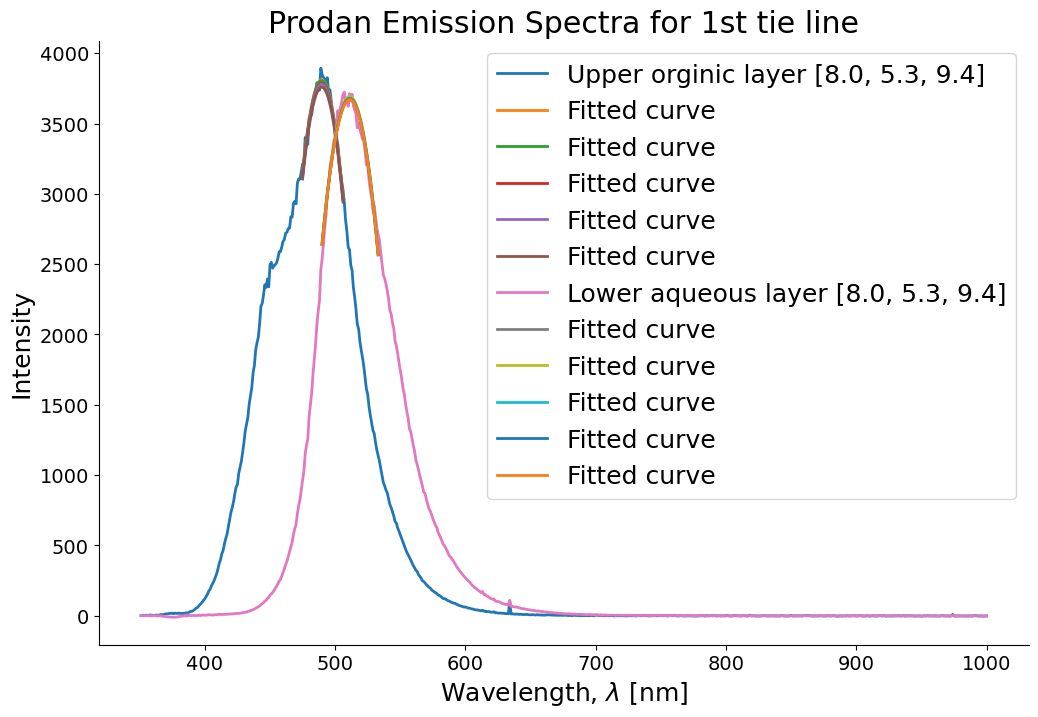

Upper ave. maximum wavelength for the sample is: 489.62708755218546 nm
Upper standard deviation for the max wavelength is: 0.016278664981628322
Lower ave. maximum wavelength for the sample is: 511.1435185646352 nm
Lower standard deviation for the max wavelength is: 0.017734323483636134


In [5]:
#Calculate the averaged value

up_01_bgn = 475
up_01_end = 507
low_01_bgn = 490
low_01_end = 534

#Upper fitting
upper_wv_fit_sample01_01,upper_inten_fit_sample01_01 = yld_xy_sliced(upper_raw_sample01_01,up_01_bgn,up_01_end)
upper_wv_fit_sample01_02,upper_inten_fit_sample01_02 = yld_xy_sliced(upper_raw_sample01_02,up_01_bgn,up_01_end)
upper_wv_fit_sample01_03,upper_inten_fit_sample01_03 = yld_xy_sliced(upper_raw_sample01_03,up_01_bgn,up_01_end)
upper_wv_fit_sample01_04,upper_inten_fit_sample01_04 = yld_xy_sliced(upper_raw_sample01_04,up_01_bgn,up_01_end)
upper_wv_fit_sample01_05,upper_inten_fit_sample01_05 = yld_xy_sliced(upper_raw_sample01_05,up_01_bgn,up_01_end)

upper_inten_fit_sample01 = [upper_inten_fit_sample01_01,upper_inten_fit_sample01_02,upper_inten_fit_sample01_03,\
                            upper_inten_fit_sample01_04,upper_inten_fit_sample01_05]

upper_initGuess01 = [-0.5,-500,180]
upper_f1_sample01 = []
upper_max_wav_sample01 = []

for i in range(len(upper_inten_fit_sample01)):
    C_fit = yld_curve_fit_Y(para_curve,upper_wv_fit_sample01_01,upper_inten_fit_sample01[i],upper_initGuess01)
    f1_individual = C_fit[0]
    max_wav_individual = C_fit[1]
    upper_f1_sample01.append(f1_individual)
    upper_max_wav_sample01.append(max_wav_individual)

upper_ave_max_wav_sample01 = sum(upper_max_wav_sample01)/len(upper_max_wav_sample01)
upper_std_max_wav_sample01 = np.std(upper_max_wav_sample01,ddof=1)

# Lower fitting
lower_wv_fit_sample01_01,lower_inten_fit_sample01_01 = yld_xy_sliced(lower_raw_sample01_01,low_01_bgn,low_01_end)
lower_wv_fit_sample01_02,lower_inten_fit_sample01_02 = yld_xy_sliced(lower_raw_sample01_02,low_01_bgn,low_01_end)
lower_wv_fit_sample01_03,lower_inten_fit_sample01_03 = yld_xy_sliced(lower_raw_sample01_03,low_01_bgn,low_01_end)
lower_wv_fit_sample01_04,lower_inten_fit_sample01_04 = yld_xy_sliced(lower_raw_sample01_04,low_01_bgn,low_01_end)
lower_wv_fit_sample01_05,lower_inten_fit_sample01_05 = yld_xy_sliced(lower_raw_sample01_05,low_01_bgn,low_01_end)

lower_inten_fit_sample01 = [lower_inten_fit_sample01_01,lower_inten_fit_sample01_02,lower_inten_fit_sample01_03,lower_inten_fit_sample01_04,lower_inten_fit_sample01_05]

lower_initGuess01 = [-0.5,-500,180]
lower_f1_sample01 = []
lower_max_wav_sample01 = []

for i in range(len(lower_inten_fit_sample01)):
    C_fit = yld_curve_fit_Y(para_curve,lower_wv_fit_sample01_01,lower_inten_fit_sample01[i],lower_initGuess01)
    f1_individual = C_fit[0]
    max_wav_individual = C_fit[1]
    lower_f1_sample01.append(f1_individual)
    lower_max_wav_sample01.append(max_wav_individual)

lower_ave_max_wav_sample01 = sum(lower_max_wav_sample01)/len(lower_max_wav_sample01)
lower_std_max_wav_sample01 = np.std(lower_max_wav_sample01,ddof=1)

#Plotting
fig1 = plt.figure(facecolor='white')
ax1 = plt.axes(frameon=True)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

plt.plot(upper_wv_sample01_01,upper_inten_sample01_01,marker = '',linestyle = '-',label = 'Upper orginic layer [8.0, 5.3, 9.4]')
plt.plot(upper_wv_fit_sample01_01,upper_f1_sample01[0],label = 'Fitted curve')
plt.plot(upper_wv_fit_sample01_01,upper_f1_sample01[1],label = 'Fitted curve')
plt.plot(upper_wv_fit_sample01_01,upper_f1_sample01[2],label = 'Fitted curve')
plt.plot(upper_wv_fit_sample01_01,upper_f1_sample01[3],label = 'Fitted curve')
plt.plot(upper_wv_fit_sample01_01,upper_f1_sample01[4],label = 'Fitted curve')

plt.plot(lower_wv_sample01_01,lower_inten_sample01_01,marker = '',linestyle = '-',label = 'Lower aqueous layer [8.0, 5.3, 9.4]')
plt.plot(lower_wv_fit_sample01_01,lower_f1_sample01[0],label = 'Fitted curve')
plt.plot(lower_wv_fit_sample01_01,lower_f1_sample01[1],label = 'Fitted curve')
plt.plot(lower_wv_fit_sample01_01,lower_f1_sample01[2],label = 'Fitted curve')
plt.plot(lower_wv_fit_sample01_01,lower_f1_sample01[3],label = 'Fitted curve')
plt.plot(lower_wv_fit_sample01_01,lower_f1_sample01[4],label = 'Fitted curve')


plt.legend(loc = 'best')
plt.title('Prodan Emission Spectra for 1st tie line')
plt.xlabel('Wavelength, $\lambda$ [nm]')
plt.ylabel('Intensity')
plt.show()


print('Upper ave. maximum wavelength for the sample is:',upper_ave_max_wav_sample01,'nm')
print('Upper standard deviation for the max wavelength is:',upper_std_max_wav_sample01)
print('Lower ave. maximum wavelength for the sample is:',lower_ave_max_wav_sample01,'nm')
print('Lower standard deviation for the max wavelength is:',lower_std_max_wav_sample01)

### For the upper and lower layer mixture Water: Toluene: Ethanol = [6.0, 4.6, 12.7]

In [6]:
# csv file format is 'vol W_ vol T_ vol E_sample no_rep no'

upper_raw_sample02_01 = yld_rawdata(specFold+'up_6W_4.6T_12.7E_sample02_01.csv',6)
upper_raw_sample02_02 = yld_rawdata(specFold+'up_6W_4.6T_12.7E_sample02_02.csv',6)
upper_raw_sample02_03 = yld_rawdata(specFold+'up_6W_4.6T_12.7E_sample02_03.csv',6)
upper_raw_sample02_04 = yld_rawdata(specFold+'up_6W_4.6T_12.7E_sample02_04.csv',6)
upper_raw_sample02_05 = yld_rawdata(specFold+'up_6W_4.6T_12.7E_sample02_05.csv',6)

upper_wv_sample02_01,upper_inten_sample02_01 = yld_xy_sliced(upper_raw_sample02_01)
upper_wv_sample02_02,upper_inten_sample02_02 = yld_xy_sliced(upper_raw_sample02_02)
upper_wv_sample02_03,upper_inten_sample02_03 = yld_xy_sliced(upper_raw_sample02_03)
upper_wv_sample02_04,upper_inten_sample02_04 = yld_xy_sliced(upper_raw_sample02_04)
upper_wv_sample02_05,upper_inten_sample02_05 = yld_xy_sliced(upper_raw_sample02_05)

lower_raw_sample02_01 = yld_rawdata(specFold+'low_6W_4.6T_12.7E_sample02_01.csv',6)
lower_raw_sample02_02 = yld_rawdata(specFold+'low_6W_4.6T_12.7E_sample02_02.csv',6)
lower_raw_sample02_03 = yld_rawdata(specFold+'low_6W_4.6T_12.7E_sample02_03.csv',6)
lower_raw_sample02_04 = yld_rawdata(specFold+'low_6W_4.6T_12.7E_sample02_04.csv',6)
lower_raw_sample02_05 = yld_rawdata(specFold+'low_6W_4.6T_12.7E_sample02_05.csv',6)

lower_wv_sample02_01,lower_inten_sample02_01 = yld_xy_sliced(lower_raw_sample02_01)
lower_wv_sample02_02,lower_inten_sample02_02 = yld_xy_sliced(lower_raw_sample02_02)
lower_wv_sample02_03,lower_inten_sample02_03 = yld_xy_sliced(lower_raw_sample02_03)
lower_wv_sample02_04,lower_inten_sample02_04 = yld_xy_sliced(lower_raw_sample02_04)
lower_wv_sample02_05,lower_inten_sample02_05 = yld_xy_sliced(lower_raw_sample02_05)

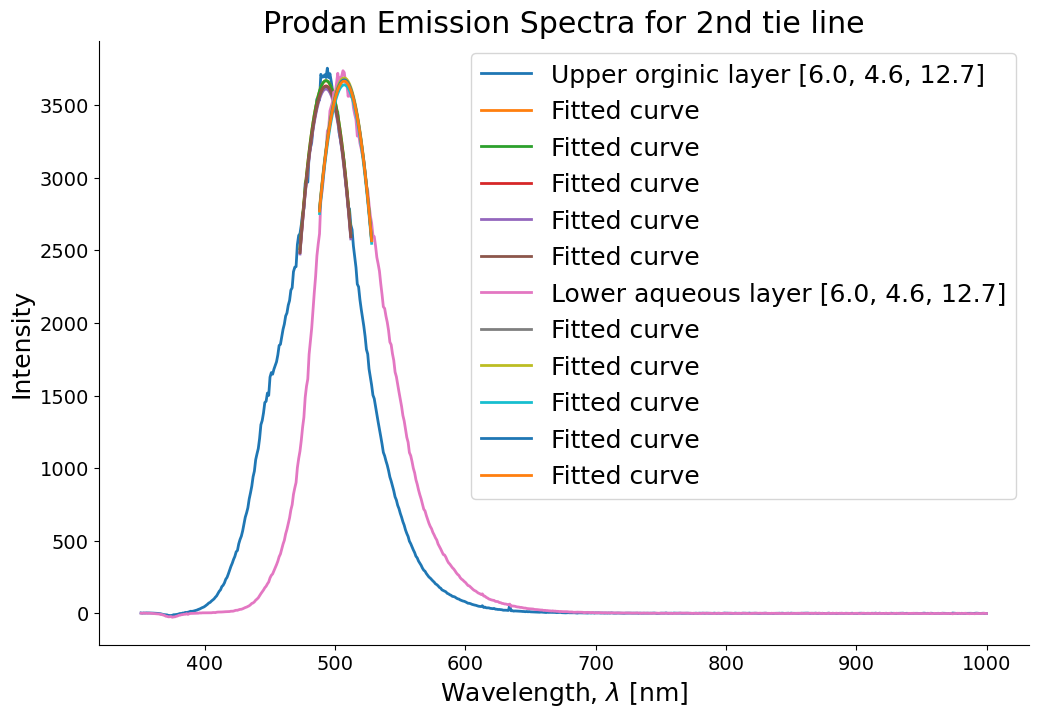

Upper ave. maximum wavelength for the sample is: 492.98186038573397 nm
Upper standard deviation for the max wavelength is: 0.00878032810306175
Lower ave. maximum wavelength for the sample is: 506.9534063341754 nm
Lower standard deviation for the max wavelength is: 0.016437774927219116


In [7]:
#Upper fitting

up_02_bgn = 473
up_02_end = 513
low_02_bgn = 488
low_02_end = 529

upper_wv_fit_sample02_01,upper_inten_fit_sample02_01 = yld_xy_sliced(upper_raw_sample02_01,up_02_bgn,up_02_end)
upper_wv_fit_sample02_02,upper_inten_fit_sample02_02 = yld_xy_sliced(upper_raw_sample02_02,up_02_bgn,up_02_end)
upper_wv_fit_sample02_03,upper_inten_fit_sample02_03 = yld_xy_sliced(upper_raw_sample02_03,up_02_bgn,up_02_end)
upper_wv_fit_sample02_04,upper_inten_fit_sample02_04 = yld_xy_sliced(upper_raw_sample02_04,up_02_bgn,up_02_end)
upper_wv_fit_sample02_05,upper_inten_fit_sample02_05 = yld_xy_sliced(upper_raw_sample02_05,up_02_bgn,up_02_end)

upper_inten_fit_sample02 = [upper_inten_fit_sample02_01,upper_inten_fit_sample02_02,upper_inten_fit_sample02_03,upper_inten_fit_sample02_04,upper_inten_fit_sample02_05]

upper_initGuess02 = [-0.5,-500,180]
upper_f1_sample02 = []
upper_max_wav_sample02 = []

for i in range(len(upper_inten_fit_sample02)):
    C_fit = yld_curve_fit_Y(para_curve,upper_wv_fit_sample02_01,upper_inten_fit_sample02[i],upper_initGuess02)
    f1_individual = C_fit[0]
    max_wav_individual = C_fit[1]
    upper_f1_sample02.append(f1_individual)
    upper_max_wav_sample02.append(max_wav_individual)

upper_ave_max_wav_sample02 = sum(upper_max_wav_sample02)/len(upper_max_wav_sample02)
upper_std_max_wav_sample02 = np.std(upper_max_wav_sample02,ddof=1)

# Lower fitting
lower_wv_fit_sample02_01,lower_inten_fit_sample02_01 = yld_xy_sliced(lower_raw_sample02_01,low_02_bgn,low_02_end)
lower_wv_fit_sample02_02,lower_inten_fit_sample02_02 = yld_xy_sliced(lower_raw_sample02_02,low_02_bgn,low_02_end)
lower_wv_fit_sample02_03,lower_inten_fit_sample02_03 = yld_xy_sliced(lower_raw_sample02_03,low_02_bgn,low_02_end)
lower_wv_fit_sample02_04,lower_inten_fit_sample02_04 = yld_xy_sliced(lower_raw_sample02_04,low_02_bgn,low_02_end)
lower_wv_fit_sample02_05,lower_inten_fit_sample02_05 = yld_xy_sliced(lower_raw_sample02_05,low_02_bgn,low_02_end)

lower_inten_fit_sample02 = [lower_inten_fit_sample02_01,lower_inten_fit_sample02_02,lower_inten_fit_sample02_03,lower_inten_fit_sample02_04,lower_inten_fit_sample02_05]

lower_initGuess02 = [-0.5,-500,180]
lower_f1_sample02 = []
lower_max_wav_sample02 = []

for i in range(len(lower_inten_fit_sample02)):
    C_fit = yld_curve_fit_Y(para_curve,lower_wv_fit_sample02_01,lower_inten_fit_sample02[i],lower_initGuess02)
    f1_individual = C_fit[0]
    max_wav_individual = C_fit[1]
    lower_f1_sample02.append(f1_individual)
    lower_max_wav_sample02.append(max_wav_individual)

lower_ave_max_wav_sample02 = sum(lower_max_wav_sample02)/len(lower_max_wav_sample02)
lower_std_max_wav_sample02 = np.std(lower_max_wav_sample02,ddof=1)

#Plotting
fig1 = plt.figure(facecolor='white')
ax1 = plt.axes(frameon=True)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

plt.plot(upper_wv_sample02_01,upper_inten_sample02_01,marker = '',linestyle = '-',label = 'Upper orginic layer [6.0, 4.6, 12.7]')
plt.plot(upper_wv_fit_sample02_01,upper_f1_sample02[0],label = 'Fitted curve')
plt.plot(upper_wv_fit_sample02_01,upper_f1_sample02[1],label = 'Fitted curve')
plt.plot(upper_wv_fit_sample02_01,upper_f1_sample02[2],label = 'Fitted curve')
plt.plot(upper_wv_fit_sample02_01,upper_f1_sample02[3],label = 'Fitted curve')
plt.plot(upper_wv_fit_sample02_01,upper_f1_sample02[4],label = 'Fitted curve')

plt.plot(lower_wv_sample02_01,lower_inten_sample02_01,marker = '',linestyle = '-',label = 'Lower aqueous layer [6.0, 4.6, 12.7]')
plt.plot(lower_wv_fit_sample02_01,lower_f1_sample02[0],label = 'Fitted curve')
plt.plot(lower_wv_fit_sample02_01,lower_f1_sample02[1],label = 'Fitted curve')
plt.plot(lower_wv_fit_sample02_01,lower_f1_sample02[2],label = 'Fitted curve')
plt.plot(lower_wv_fit_sample02_01,lower_f1_sample02[3],label = 'Fitted curve')
plt.plot(lower_wv_fit_sample02_01,lower_f1_sample02[4],label = 'Fitted curve')


plt.legend(loc = 'best')
plt.title('Prodan Emission Spectra for 2nd tie line')
plt.xlabel('Wavelength, $\lambda$ [nm]')
plt.ylabel('Intensity')
plt.show()


print('Upper ave. maximum wavelength for the sample is:',upper_ave_max_wav_sample02,'nm')
print('Upper standard deviation for the max wavelength is:',upper_std_max_wav_sample02)
print('Lower ave. maximum wavelength for the sample is:',lower_ave_max_wav_sample02,'nm')
print('Lower standard deviation for the max wavelength is:',lower_std_max_wav_sample02)

### For the upper and lower layer mixture Water: Toluene: Ethanol = [3.0, 10.15, 10.4]

In [8]:
# csv file format is 'vol W_ vol T_ vol E_sample no_rep no'

upper_raw_sample03_01 = yld_rawdata(specFold+'up_3W_10.15T_10.4E_sample03_01.csv',6)
upper_raw_sample03_02 = yld_rawdata(specFold+'up_3W_10.15T_10.4E_sample03_02.csv',6)
upper_raw_sample03_03 = yld_rawdata(specFold+'up_3W_10.15T_10.4E_sample03_03.csv',6)
upper_raw_sample03_04 = yld_rawdata(specFold+'up_3W_10.15T_10.4E_sample03_04.csv',6)
upper_raw_sample03_05 = yld_rawdata(specFold+'up_3W_10.15T_10.4E_sample03_05.csv',6)

upper_wv_sample03_01,upper_inten_sample03_01 = yld_xy_sliced(upper_raw_sample03_01)
upper_wv_sample03_02,upper_inten_sample03_02 = yld_xy_sliced(upper_raw_sample03_02)
upper_wv_sample03_03,upper_inten_sample03_03 = yld_xy_sliced(upper_raw_sample03_03)
upper_wv_sample03_04,upper_inten_sample03_04 = yld_xy_sliced(upper_raw_sample03_04)
upper_wv_sample03_05,upper_inten_sample03_05 = yld_xy_sliced(upper_raw_sample03_05)

lower_raw_sample03_01 = yld_rawdata(specFold+'low_3W_10.15T_10.4E_sample03_01.csv',6)
lower_raw_sample03_02 = yld_rawdata(specFold+'low_3W_10.15T_10.4E_sample03_02.csv',6)
lower_raw_sample03_03 = yld_rawdata(specFold+'low_3W_10.15T_10.4E_sample03_03.csv',6)
lower_raw_sample03_04 = yld_rawdata(specFold+'low_3W_10.15T_10.4E_sample03_04.csv',6)
lower_raw_sample03_05 = yld_rawdata(specFold+'low_3W_10.15T_10.4E_sample03_05.csv',6)

lower_wv_sample03_01,lower_inten_sample03_01 = yld_xy_sliced(lower_raw_sample03_01)
lower_wv_sample03_02,lower_inten_sample03_02 = yld_xy_sliced(lower_raw_sample03_02)
lower_wv_sample03_03,lower_inten_sample03_03 = yld_xy_sliced(lower_raw_sample03_03)
lower_wv_sample03_04,lower_inten_sample03_04 = yld_xy_sliced(lower_raw_sample03_04)
lower_wv_sample03_05,lower_inten_sample03_05 = yld_xy_sliced(lower_raw_sample03_05)

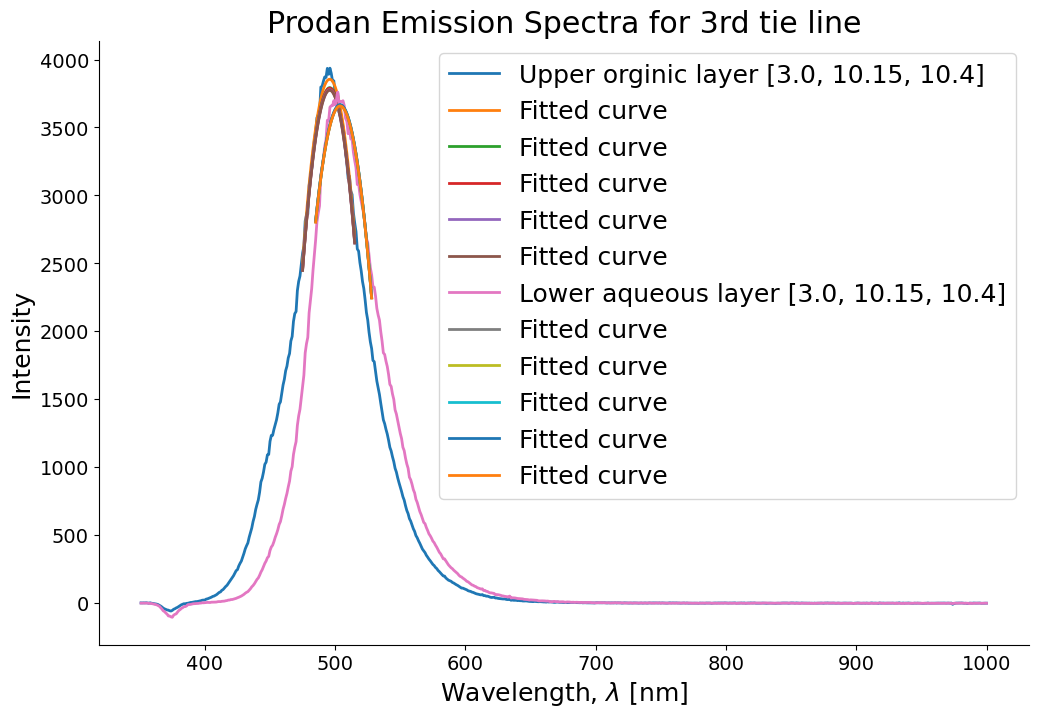

Upper ave. maximum wavelength for the sample is: 495.8127029494124 nm
Upper standard deviation for the max wavelength is: 0.019729572691782285
Lower ave. maximum wavelength for the sample is: 503.8115704509106 nm
Lower standard deviation for the max wavelength is: 0.007455332934221631


In [9]:
#Upper fitting

up_03_bgn = 475
up_03_end = 516
low_03_bgn = 485
low_03_end = 529

upper_wv_fit_sample03_01,upper_inten_fit_sample03_01 = yld_xy_sliced(upper_raw_sample03_01,up_03_bgn,up_03_end)
upper_wv_fit_sample03_02,upper_inten_fit_sample03_02 = yld_xy_sliced(upper_raw_sample03_02,up_03_bgn,up_03_end)
upper_wv_fit_sample03_03,upper_inten_fit_sample03_03 = yld_xy_sliced(upper_raw_sample03_03,up_03_bgn,up_03_end)
upper_wv_fit_sample03_04,upper_inten_fit_sample03_04 = yld_xy_sliced(upper_raw_sample03_04,up_03_bgn,up_03_end)
upper_wv_fit_sample03_05,upper_inten_fit_sample03_05 = yld_xy_sliced(upper_raw_sample03_05,up_03_bgn,up_03_end)

upper_inten_fit_sample03 = [upper_inten_fit_sample03_01,upper_inten_fit_sample03_02,upper_inten_fit_sample03_03,upper_inten_fit_sample03_04,upper_inten_fit_sample03_05]

upper_initGuess03 = [-0.5,-500,180]
upper_f1_sample03 = []
upper_max_wav_sample03 = []

for i in range(len(upper_inten_fit_sample03)):
    C_fit = yld_curve_fit_Y(para_curve,upper_wv_fit_sample03_01,upper_inten_fit_sample03[i],upper_initGuess03)
    f1_individual = C_fit[0]
    max_wav_individual = C_fit[1]
    upper_f1_sample03.append(f1_individual)
    upper_max_wav_sample03.append(max_wav_individual)

upper_ave_max_wav_sample03 = sum(upper_max_wav_sample03)/len(upper_max_wav_sample03)
upper_std_max_wav_sample03 = np.std(upper_max_wav_sample03,ddof=1)

# Lower fitting
lower_wv_fit_sample03_01,lower_inten_fit_sample03_01 = yld_xy_sliced(lower_raw_sample03_01,low_03_bgn,low_03_end)
lower_wv_fit_sample03_02,lower_inten_fit_sample03_02 = yld_xy_sliced(lower_raw_sample03_02,low_03_bgn,low_03_end)
lower_wv_fit_sample03_03,lower_inten_fit_sample03_03 = yld_xy_sliced(lower_raw_sample03_03,low_03_bgn,low_03_end)
lower_wv_fit_sample03_04,lower_inten_fit_sample03_04 = yld_xy_sliced(lower_raw_sample03_04,low_03_bgn,low_03_end)
lower_wv_fit_sample03_05,lower_inten_fit_sample03_05 = yld_xy_sliced(lower_raw_sample03_05,low_03_bgn,low_03_end)

lower_inten_fit_sample03 = [lower_inten_fit_sample03_01,lower_inten_fit_sample03_02,lower_inten_fit_sample03_03,lower_inten_fit_sample03_04,lower_inten_fit_sample03_05]

lower_initGuess03 = [-0.5,-500,180]
lower_f1_sample03 = []
lower_max_wav_sample03 = []

for i in range(len(lower_inten_fit_sample03)):
    C_fit = yld_curve_fit_Y(para_curve,lower_wv_fit_sample03_01,lower_inten_fit_sample03[i],lower_initGuess03)
    f1_individual = C_fit[0]
    max_wav_individual = C_fit[1]
    lower_f1_sample03.append(f1_individual)
    lower_max_wav_sample03.append(max_wav_individual)

lower_ave_max_wav_sample03 = sum(lower_max_wav_sample03)/len(lower_max_wav_sample03)
lower_std_max_wav_sample03 = np.std(lower_max_wav_sample03,ddof=1)

#Plotting
fig1 = plt.figure(facecolor='white')
ax1 = plt.axes(frameon=True)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

plt.plot(upper_wv_sample03_01,upper_inten_sample03_01,marker = '',linestyle = '-',label = 'Upper orginic layer [3.0, 10.15, 10.4]')
plt.plot(upper_wv_fit_sample03_01,upper_f1_sample03[0],label = 'Fitted curve')
plt.plot(upper_wv_fit_sample03_01,upper_f1_sample03[1],label = 'Fitted curve')
plt.plot(upper_wv_fit_sample03_01,upper_f1_sample03[2],label = 'Fitted curve')
plt.plot(upper_wv_fit_sample03_01,upper_f1_sample03[3],label = 'Fitted curve')
plt.plot(upper_wv_fit_sample03_01,upper_f1_sample03[4],label = 'Fitted curve')

plt.plot(lower_wv_sample03_01,lower_inten_sample03_01,marker = '',linestyle = '-',label = 'Lower aqueous layer [3.0, 10.15, 10.4]')
plt.plot(lower_wv_fit_sample03_01,lower_f1_sample03[0],label = 'Fitted curve')
plt.plot(lower_wv_fit_sample03_01,lower_f1_sample03[1],label = 'Fitted curve')
plt.plot(lower_wv_fit_sample03_01,lower_f1_sample03[2],label = 'Fitted curve')
plt.plot(lower_wv_fit_sample03_01,lower_f1_sample03[3],label = 'Fitted curve')
plt.plot(lower_wv_fit_sample03_01,lower_f1_sample03[4],label = 'Fitted curve')


plt.legend(loc = 'best')
plt.title('Prodan Emission Spectra for 3rd tie line')
plt.xlabel('Wavelength, $\lambda$ [nm]')
plt.ylabel('Intensity')
plt.show()


print('Upper ave. maximum wavelength for the sample is:',upper_ave_max_wav_sample03,'nm')
print('Upper standard deviation for the max wavelength is:',upper_std_max_wav_sample03)
print('Lower ave. maximum wavelength for the sample is:',lower_ave_max_wav_sample03,'nm')
print('Lower standard deviation for the max wavelength is:',lower_std_max_wav_sample03)

## R-value determinations

In [10]:
upper_ave_wav_samples = [upper_ave_max_wav_sample01,upper_ave_max_wav_sample02,upper_ave_max_wav_sample03]
upper_std_wav_samples = [upper_std_max_wav_sample01,upper_std_max_wav_sample02,upper_std_max_wav_sample03]
lower_ave_wav_samples = [lower_ave_max_wav_sample01,lower_ave_max_wav_sample02,lower_ave_max_wav_sample03]
lower_std_wav_samples = [lower_std_max_wav_sample01,lower_std_max_wav_sample02,lower_std_max_wav_sample03]

print(upper_ave_wav_samples)
print(upper_std_wav_samples)
print(lower_ave_wav_samples)
print(lower_std_wav_samples)

[489.62708755218546, 492.98186038573397, 495.8127029494124]
[0.016278664981628322, 0.00878032810306175, 0.019729572691782285]
[511.1435185646352, 506.9534063341754, 503.8115704509106]
[0.017734323483636134, 0.016437774927219116, 0.007455332934221631]


$R=\frac{\lambda_{e}-\lambda_{n}}{\lambda_{n+1}-\lambda_{n}}$ 

where $\lambda_{n}<\lambda_{e}<\lambda_{n+1}$

In [11]:
binodal_ave_wav_samples = [422.7707479023763, 490.5, 496.9, 499.2, 499.7885468660831, 503.20555282788075, 503.4, 505.15714714765227, 510.79481262199204, 525.7577896073973]
upper_list_calcs = []
lower_list_calcs = []
upper_R_val = []
lower_R_val = []
for i in upper_ave_wav_samples:
    print('Upper wavelength considered:',i)
    mod_list = binodal_ave_wav_samples + [i]
    mod_list.sort()
    print(mod_list)
    i_upper_sample = mod_list.index(i)

    λe = i
    λn = mod_list[i_upper_sample-1]
    λn1 = mod_list[i_upper_sample+1]

    print('λe:',λe)
    print('λn:',λn)
    print('λn+1:',λn1)

    R_val = (λe-λn)/(λn1-λn)
    print(R_val)
    upper_R_val.append(R_val)
    upper_list_calcs.append([λn,λe,λn1])

for i in lower_ave_wav_samples:
    print('Lower wavelength considered:',i)
    mod_list = binodal_ave_wav_samples + [i]
    mod_list.sort()
    print(mod_list)
    i_lower_sample = mod_list.index(i)

    λe = i
    λn = mod_list[i_lower_sample-1]
    λn1 = mod_list[i_lower_sample+1]

    print('λe:',λe)
    print('λn:',λn)
    print('λn+1:',λn1)

    R_val = (λe-λn)/(λn1-λn)
    print(R_val)
    lower_R_val.append(R_val)
    lower_list_calcs.append([λn,λe,λn1])

Upper wavelength considered: 489.62708755218546
[424.28153495555006, 489.62708755218546, 490.5, 496.9, 499.2, 499.7885468660831, 503.20555282788075, 503.4, 505.15714714765227, 510.79481262199204, 526.52120905586]
λe: 489.62708755218546
λn: 424.28153495555006
λn+1: 490.5
0.986817688280322
Upper wavelength considered: 492.98186038573397
[424.28153495555006, 490.5, 492.98186038573397, 496.9, 499.2, 499.7885468660831, 503.20555282788075, 503.4, 505.15714714765227, 510.79481262199204, 526.52120905586]
λe: 492.98186038573397
λn: 490.5
λn+1: 496.9
0.3877906852709337
Upper wavelength considered: 495.8127029494124
[424.28153495555006, 490.5, 495.8127029494124, 496.9, 499.2, 499.7885468660831, 503.20555282788075, 503.4, 505.15714714765227, 510.79481262199204, 526.52120905586]
λe: 495.8127029494124
λn: 490.5
λn+1: 496.9
0.8301098358456945
Lower wavelength considered: 511.1435185646352
[424.28153495555006, 490.5, 496.9, 499.2, 499.7885468660831, 503.20555282788075, 503.4, 505.15714714765227, 510.7

In [12]:
print(upper_list_calcs)
print(lower_list_calcs)
print(upper_R_val)
print(lower_R_val)

[[424.28153495555006, 489.62708755218546, 490.5], [490.5, 492.98186038573397, 496.9], [490.5, 495.8127029494124, 496.9]]
[[510.79481262199204, 511.1435185646352, 526.52120905586], [505.15714714765227, 506.9534063341754, 510.79481262199204], [503.4, 503.8115704509106, 505.15714714765227]]
[0.986817688280322, 0.3877906852709337, 0.8301098358456945]
[0.022173289609576385, 0.3186175544999816, 0.23422651396072702]


In [14]:
for i in range(len(upper_R_val)):
    λe = upper_list_calcs[i][1]
    λn = upper_list_calcs[i][0]
    λn1 = upper_list_calcs[i][2]
    R_val = upper_R_val[i]

    print('Table format for the upper R value is:','|', λn, '|',λe, '|',λn1,'|',R_val,'|')

for i in range(len(lower_R_val)):
    λe = lower_list_calcs[i][1]
    λn = lower_list_calcs[i][0]
    λn1 = lower_list_calcs[i][2]
    R_val = lower_R_val[i]

    print('Table format for the lower R value is:','|', λn, '|',λe, '|',λn1,'|',R_val,'|')

Table format for the upper R value is: | 424.28153495555006 | 489.62708755218546 | 490.5 | 0.986817688280322 |
Table format for the upper R value is: | 490.5 | 492.98186038573397 | 496.9 | 0.3877906852709337 |
Table format for the upper R value is: | 490.5 | 495.8127029494124 | 496.9 | 0.8301098358456945 |
Table format for the lower R value is: | 510.79481262199204 | 511.1435185646352 | 526.52120905586 | 0.022173289609576385 |
Table format for the lower R value is: | 505.15714714765227 | 506.9534063341754 | 510.79481262199204 | 0.3186175544999816 |
Table format for the lower R value is: | 503.4 | 503.8115704509106 | 505.15714714765227 | 0.23422651396072702 |


Upper phase R-values

| $\lambda_{n}$ | $\lambda_{e}$ | $\lambda_{n+1}$ | R value |
|:-:|:-:|:-:|:-:|
| 424.28153495555006 | 489.62708755218546 | 490.5 | 0.986817688280322 |
| 490.5 | 492.98186038573397 | 496.9 | 0.3877906852709337 |
| 490.5 | 495.8127029494124 | 496.9 | 0.8301098358456945 |


Lower phase R-values

| $\lambda_{n}$ | $\lambda_{e}$ | $\lambda_{n+1}$ | R value |
|:-:|:-:|:-:|:-:|
| 510.79481262199204 | 511.1435185646352 | 526.52120905586 | 0.022173289609576385 |
| 505.15714714765227 | 506.9534063341754 | 510.79481262199204 | 0.3186175544999816 |
| 503.4 | 503.8115704509106 | 505.15714714765227 | 0.23422651396072702 |

## Plot all the data on the same graph.